In [105]:
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np

cleaned_df = pd.DataFrame(pd.read_csv("../data/cleaned_COUNTY_data.csv"))

In [106]:
#get target crops from txt file
with open("croptarget.txt") as f:
    crops = [line.strip() for line in f.readlines() if line.strip()]

print(crops)

['BARLEY', 'BEANS', 'BEETS', 'CANOLA', 'CORN', 'COTTON', 'GRAIN', 'GRASSES', 'GRASSES & LEGUMES, OTHER', 'GUAR', 'HAY', 'HAY & HAYLAGE', 'HAYLAGE', 'MILLET', 'MINT', 'MISCANTHUS', 'MUSTARD', 'OATS', 'PEANUTS', 'POPcorn', 'RICE', 'RYE', 'SAFFLOWER', 'SESAME', 'SORGHUM', 'SUGARCANE', 'SUNFLOWER', 'TRITICALE', 'WHEAT']


In [107]:
#NaN values for unreported numbers from farms
cleaned_df = cleaned_df.fillna(0)
cleaned_df.drop("Unnamed: 0",axis=1,inplace=True)
cleaned_df

,YEAR,AGLAND_AGLANDACRES,AGLAND_AGLANDCROPINSURANCEACRES,AGLAND_AGLANDCROPINSURANCENUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDACRES,AGLAND_AGLANDCROPLANDAREAMEASUREDINPCTOFAGLAND,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDACRES,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDALLCROPSFAILEDACRES,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDALLCROPSFAILEDNUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDEXCLHARVESTEDPASTUREDCULTIVATEDSUMMERFALLOWACRES,...,WHEAT_WHEATSPRINGEXCLDURUMPRODUCTIONMEASUREDINBU,WHEAT_WHEATWINTERACRESHARVESTED,WHEAT_WHEATWINTERIRRIGATEDACRESHARVESTED,WHEAT_WHEATWINTERIRRIGATEDOPERATIONSWITHAREAHARVESTED,WHEAT_WHEATWINTEROPERATIONSWITHAREAHARVESTED,WHEAT_WHEATWINTERPRODUCTIONMEASUREDINBU,WOOL_WOOLOPERATIONSWITHPRODUCTION,WOOL_WOOLPRODUCTIONMEASUREDINLB,WOOL_WOOLSALESMEASUREDIN,COUNTY_NAME
0,2012,7391.0,10512.0,32.0,70333.0,13.75,4862.0,3134.0,85.0,858.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ANDERSON
1,2017,32795.0,14907.0,14.0,63774.0,13.75,4239.5,1979.0,59.0,2112.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ANDERSON
2,2022,32469.0,16196.0,41.0,69021.0,13.75,5632.0,2740.0,103.0,3542.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,ANDERSON
3,2012,24662.0,23915.0,19.0,71517.0,8.00,29342.5,9247.0,26.0,7806.0,...,0.0,1500.0,320.0,2.0,2.0,31400.0,1.0,2250.0,0.0,ANDREWS
4,2017,32830.0,322066.0,12.0,78257.0,8.00,35201.5,9247.0,12.0,7806.0,...,0.0,1500.0,320.0,4.0,7.0,31400.0,2.0,2250.0,0.0,ANDREWS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,2017,15203.0,21736.0,21.0,18856.0,6.50,12208.0,247.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,ZAPATA
758,2022,4025.0,23413.0,17.0,5980.0,6.50,1897.5,247.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,ZAPATA
759,2012,295056.0,50198.0,39.0,95980.0,9.50,11980.5,4298.0,27.0,4936.0,...,0.0,3978.0,2206.0,10.0,23.0,247228.0,1.0,0.0,0.0,ZAVALA
760,2017,401018.0,57149.0,39.0,76046.0,9.50,15045.0,1731.0,12.0,10893.0,...,0.0,3978.0,2206.0,13.0,19.0,247228.0,1.0,0.0,0.0,ZAVALA


In [108]:
#find columns based on <crop> _ PRODUCTION for target df
target_cols = [
    col for col in cleaned_df.columns
    if col.split("_")[0] in crops and "PRODUCTION" in col.upper()
]

target_df = cleaned_df[target_cols]

In [109]:
target_df

,BARLEY_BARLEYPRODUCTIONMEASUREDINBU,BEANS_BEANSDRYEDIBLEEXCLCHICKPEASLIMAPRODUCTIONMEASUREDINCWT,BEANS_BEANSDRYEDIBLEEXCLLIMAPRODUCTIONMEASUREDINCWT,CANOLA_CANOLAPRODUCTIONMEASUREDINLB,CORN_CORNGRAINPRODUCTIONMEASUREDINBU,CORN_CORNSILAGEPRODUCTIONMEASUREDINTONS,COTTON_COTTONPIMAPRODUCTIONMEASUREDINBALES,COTTON_COTTONPRODUCTIONMEASUREDINBALES,COTTON_COTTONUPLANDPRODUCTIONMEASUREDINBALES,GRAIN_GRAINPRODUCTIONCONTRACTOPERATIONSWITHPRODUCTION,...,SUGARCANE_SUGARCANESEEDPRODUCTIONMEASUREDINTONS,SUGARCANE_SUGARCANESUGARPRODUCTIONMEASUREDINTONS,SUGARCANE_SUGARCANESUGARSEEDPRODUCTIONMEASUREDINTONS,SUNFLOWER_SUNFLOWERNONOILTYPEPRODUCTIONMEASUREDINLB,SUNFLOWER_SUNFLOWEROILTYPEPRODUCTIONMEASUREDINLB,SUNFLOWER_SUNFLOWERPRODUCTIONMEASUREDINLB,TRITICALE_TRITICALEPRODUCTIONMEASUREDINBU,WHEAT_WHEATPRODUCTIONMEASUREDINBU,WHEAT_WHEATSPRINGEXCLDURUMPRODUCTIONMEASUREDINBU,WHEAT_WHEATWINTERPRODUCTIONMEASUREDINBU
0,0.0,42.0,0.0,0.0,47125.0,1755.0,0.0,1512.0,1512.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,0.0,337470.0,1755.0,0.0,1512.0,1512.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,60.0,0.0,0.0,192297.5,1755.0,0.0,1512.0,1512.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6189.0,6189.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31400.0,0.0,31400.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10336.0,10336.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31400.0,0.0,31400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759,0.0,0.0,0.0,0.0,579481.0,0.0,0.0,12521.0,12521.0,0.0,...,0.0,0.0,0.0,315000.0,301788.0,459288.0,0.0,274370.0,0.0,247228.0
760,0.0,0.0,0.0,0.0,1104854.0,0.0,0.0,19746.0,19746.0,0.0,...,0.0,0.0,0.0,315000.0,253176.0,253176.0,0.0,333464.0,0.0,247228.0


In [110]:
#drop target columns for model
cleaned_df.drop(target_df.columns, axis=1, inplace=True)
cleaned_df.shape

(762, 2135)

In [111]:
leakage_patterns = ["PRODUCTION", "HARVESTED", "HARVEST", "YIELD"]

mask = ~cleaned_df.columns.str.contains("|".join(leakage_patterns), case=False)

X_clean = cleaned_df.loc[:, mask]

In [112]:
#prep for tensorflow
X = X_clean.drop(X_clean.columns[[0,1455]], axis=1, errors="ignore")
y = target_df

X = X.apply(pd.to_numeric, errors="coerce")

X

,AGLAND_AGLANDACRES,AGLAND_AGLANDCROPINSURANCEACRES,AGLAND_AGLANDCROPINSURANCENUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDACRES,AGLAND_AGLANDCROPLANDAREAMEASUREDINPCTOFAGLAND,AGLAND_AGLANDCROPLANDEXCLPASTUREDOPERATIONSWITHTREATED,AGLAND_AGLANDCROPLANDEXCLPASTUREDTREATEDMEASUREDINACRES,AGLAND_AGLANDCROPLANDNUMBEROFOPERATIONS,AGLAND_AGLANDCROPLANDPASTUREDONLYACRES,AGLAND_AGLANDCROPLANDPASTUREDONLYNUMBEROFOPERATIONS,...,WALNUTS_WALNUTSENGLISHACRESBEARING,WALNUTS_WALNUTSENGLISHACRESBEARINGNONBEARING,WALNUTS_WALNUTSENGLISHACRESNONBEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREABEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREABEARINGNONBEARING,WALNUTS_WALNUTSENGLISHOPERATIONSWITHAREANONBEARING,WATER_WATERIRRIGATIONSOURCEOFFFARMSUPPLIERFEDERALBUREAUOFRECLAMATIONOPERATIONSWITHWATERRECEIVED,WHEAT_WHEATOPERATIONSWITHSALES,WHEAT_WHEATSALESMEASUREDIN,WOOL_WOOLSALESMEASUREDIN
0,7391.0,10512.0,32.0,70333.0,13.75,349.0,16018.0,1252.0,6300.0,113.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0
1,32795.0,14907.0,14.0,63774.0,13.75,335.0,21529.0,1098.0,3018.0,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0
2,32469.0,16196.0,41.0,69021.0,13.75,341.0,19072.0,1041.0,6817.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0
3,24662.0,23915.0,19.0,71517.0,8.00,28.0,11196.0,113.0,3163.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
4,32830.0,322066.0,12.0,78257.0,8.00,30.0,13780.0,81.0,3163.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,15203.0,21736.0,21.0,18856.0,6.50,8.0,1275.0,52.0,3105.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
758,4025.0,23413.0,17.0,5980.0,6.50,3.0,1507.5,36.0,1953.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
759,295056.0,50198.0,39.0,95980.0,9.50,48.0,27759.0,118.0,42662.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,1655000.0,0.0
760,401018.0,57149.0,39.0,76046.0,9.50,38.0,34367.0,121.0,17766.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,1044000.0,0.0


In [113]:
corr_matrix = pd.DataFrame(X).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop them
X_reduced = X.drop(columns=to_drop)
print("Dropped highly correlated features:", len(to_drop))

Dropped highly correlated features: 495


In [115]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Step 1: Use the correlation-cleaned feature matrix
X_corrclean = X_reduced   # (after leakage removal + correlation filtering)

# Step 2: Initialize importance vector with correct length
importances = np.zeros(X_corrclean.shape[1])

# Step 3: Loop over each production target (each crop)
for i in range(y.shape[1]):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_corrclean, y.iloc[:, i])
    importances += rf.feature_importances_

# Step 4: Average importance across all targets
importances /= y.shape[1]

# Step 5: Select top 200 most important features
top_idx = np.argsort(importances)[-200:]

# Step 6: Reduce dataset
X_reduced = X_corrclean.iloc[:, top_idx]


In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)


In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_scaled)


In [118]:
X_pca

array([[ 1.49648630e+00, -5.64426867e+00, -3.25413263e+00, ...,
         4.73874630e-02, -8.77903018e-02, -1.36390654e-03],
       [ 1.35464298e+00, -5.23216635e+00, -3.44732536e+00, ...,
         8.39903061e-02, -9.36134360e-02, -3.13716097e-03],
       [ 4.35831491e+00, -4.96045197e+00, -3.84902231e+00, ...,
         2.91287609e-02,  1.56810482e-02, -5.79230674e-03],
       ...,
       [-3.32401578e+00,  2.07828021e+00,  1.65393423e+00, ...,
        -1.02111969e-01, -2.09704124e-02, -1.20445429e-02],
       [-3.53735620e+00,  2.38249423e+00,  1.62018495e+00, ...,
        -1.01557959e-02, -2.44901475e-04,  5.86169296e-04],
       [-3.48464655e+00,  2.39976501e+00,  1.65570539e+00, ...,
        -1.09184807e-01, -2.72405802e-02, -4.57530677e-03]])

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


In [120]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.score(X_val, y_val))


-167.06507191957132


In [126]:

input_dim = X_pca.shape[1]
output_dim = y_train.shape[1]



model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(input_dim,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(42)  # one output per crop
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10000,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)


Epoch 1/10000
20/20 - 0s - loss: 3442084937728.0000 - mae: 115988.9688 - val_loss: 8056529747968.0000 - val_mae: 124973.3438 - lr: 0.0010 - 366ms/epoch - 18ms/step
Epoch 2/10000
20/20 - 0s - loss: 3442083889152.0000 - mae: 115988.8438 - val_loss: 8056527650816.0000 - val_mae: 124973.3203 - lr: 0.0010 - 40ms/epoch - 2ms/step
Epoch 3/10000
20/20 - 0s - loss: 3442082578432.0000 - mae: 115988.7812 - val_loss: 8056525029376.0000 - val_mae: 124973.3750 - lr: 0.0010 - 47ms/epoch - 2ms/step
Epoch 4/10000
20/20 - 0s - loss: 3442079432704.0000 - mae: 115988.7031 - val_loss: 8056518213632.0000 - val_mae: 124973.5703 - lr: 0.0010 - 41ms/epoch - 2ms/step
Epoch 5/10000
20/20 - 0s - loss: 3442072879104.0000 - mae: 115988.5547 - val_loss: 8056507727872.0000 - val_mae: 124973.7656 - lr: 0.0010 - 40ms/epoch - 2ms/step
Epoch 6/10000
20/20 - 0s - loss: 3442062655488.0000 - mae: 115988.3594 - val_loss: 8056490950656.0000 - val_mae: 124974.0234 - lr: 0.0010 - 45ms/epoch - 2ms/step
Epoch 7/10000
20/20 - 0s -

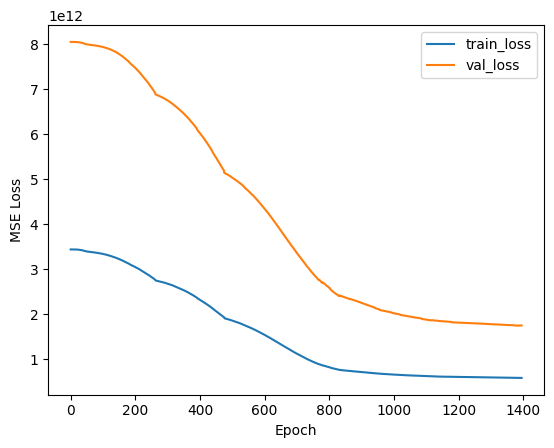

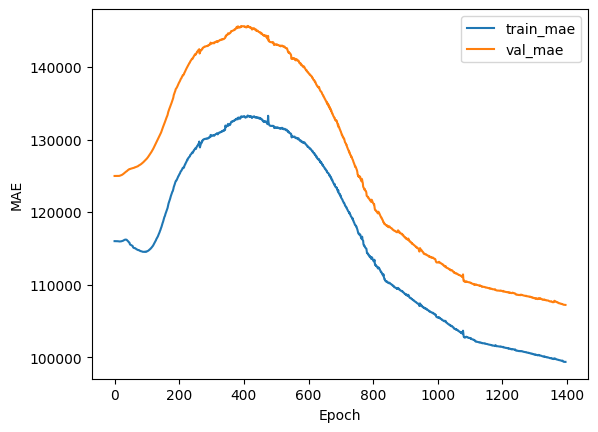

In [127]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

plt.plot(history.history['mae'], label='train_mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()
